In [963]:

%load_ext autoreload
%autoreload 2
import glob
#from cleaning_data import cleaning_match
import pandas as pd
from feature_extraction import extracting_total_outs_per_batsman, runs_per_season, all_features, player_info, extracting_age
from cleaning_data import concating_dataframes, cleaning_replacing
from train_test import train_and_test

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)  

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [600]:
all_df =concating_dataframes('../../capstone_project/ipl_csv/Data/trial/')

In [16]:
type(all_df.season.unique()[0])

numpy.int64

In [233]:
train = all_df[(all_df.season !=2017)]

test = all_df[all_df.season == 2017]

In [229]:
train.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

In [234]:
train_with_features = all_features(train)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [625]:
train, test = train_and_test(2015, 2016)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [725]:
scalar = StandardScaler()

In [699]:
X_train = train.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)
y_test = test['runs_scored'].values

In [634]:
#r = RandomForestRegressor(n_estimators=10000, oob_score=True, n_jobs=-1,min_samples_leaf=30)

In [641]:
rf = RandomForestRegressor(n_estimators=10000, oob_score=True, n_jobs=-1,min_samples_leaf=30)

In [642]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=30, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [643]:
y_pred = rf.predict(X_test)

In [644]:
rf.score(X_test, y_test)

-1.5027583060979937

In [645]:
mean_squared_error(y_pred, y_test)

66835.24575854026

In [359]:
X_test.columns

Index(['player_id', 'Australia', 'Bangladesh', 'England', 'India',
       'Netherlands', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
       'West Indies', 'Zimbabwea', 'season', 'ball', 'matches', 'total_outs',
       'highest_score', 'Average', 'strike_rate', 'Average_1st_innings',
       'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'age'],
      dtype='object')

In [360]:
X_test.season = X_test.season.astype(int)

In [361]:
X_test.age = X_test.age.astype(int)

In [378]:
Average = X_train.Average.values.mean()

Average_1 = X_train.Average_1st_innings.values.mean()
Average_2 = X_train.Average_2nd_innings.values.mean()

X_test.Average_1st_innings = X_test.Average_1st_innings.replace('', Average_1)
X_test.Average_2nd_innings = X_test.Average_2nd_innings.replace('', Average_2)


In [379]:
X_test.Average = X_test.Average.replace('', Average)

In [382]:
X_test.Average_1st_innings = X_test.Average_1st_innings.replace('', Average_1)
X_test.Average_2nd_innings= X_test.Average_2nd_innings.replace('', Average_2)

In [ ]:
X_test.replace('', X_test)

In [429]:
def replace(df):
    cols = df.columns
    for col in cols:
        col_avg = train[col].values.mean()
        df[col] = df[col].replace('', col_avg)
    return test


In [659]:
len(test.columns)

34

In [432]:
test = test.drop(['batsman_striker', 'Batting_hand', 'Bowling_skill', 'DOB'], axis=1)

In [433]:
test = replace(test)

In [408]:
cols = ['ball', 'matches', 'total_outs',
       'highest_score', 'Average', 'strike_rate', 'Average_1st_innings',
       'strike_rate_1st_innings','strike_rate_1st_innings','Average_2nd_innings','strike_rate_2nd_innings','toss_win_count','30+','50+','75+','number_of_zeros']

In [407]:
X_test.columns

Index(['player_id', 'Australia', 'Bangladesh', 'England', 'India',
       'Netherlands', 'New Zealand', 'Pakistan', 'South Africa', 'Sri Lanka',
       'West Indies', 'Zimbabwea', 'season', 'ball', 'matches', 'total_outs',
       'highest_score', 'Average', 'strike_rate', 'Average_1st_innings',
       'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'age'],
      dtype='object')

In [409]:
X_test = replace(cols=cols)

In [402]:
for value in X_test.values:
    if type(value) == str:
        print(True)

In [467]:
from sklearn.model_selection import GridSearchCV

In [ ]:
pa

In [ ]:
RandomForestRegressor([n_estimators=100,1000,10000,100000] )

In [470]:
gs = GridSearchCV(RandomForestRegressor(n_estimators=100, ), cv=5)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [491]:
from sklearn.ensemble import GradientBoostingRegressor

In [532]:
gb = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf= 3,n_estimators=50000 )

In [734]:
gboostiii = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000, max_features='sqrt' )

gboostiii.fit(X_train, y_train)

g_predictiii = gboosti.predict(X_test)

gboostiii.score(X_test, y_test)

-0.07402216791582883

In [735]:
mean_squared_error(y_test, g_predictiii)

51391.41297061636

In [701]:
g_t_predici = gboosti.predict(X_train)

In [721]:
g_t_predici

array([ 81.99977542,   3.99982074, 148.99993642, ...,  86.00001639,
        20.00068324,   6.00000749])

In [692]:
mean_squared_error(y_train, g_t_predic)

9.99825577855156e-08

In [657]:
mean_squared_error(y_test, y_pred)

66835.24575854026

In [651]:
gb.feature_importances_

array([0.03978492, 0.01896915, 0.05826849, 0.01258677, 0.01535818,
       0.02747074, 0.04138922, 0.05777069, 0.03470575, 0.03761355,
       0.03533598, 0.03481547, 0.01286734, 0.00444419, 0.00285782,
       0.0010618 , 0.00629507, 0.00199457, 0.00016554, 0.0004838 ,
       0.00640046, 0.00054917, 0.00820863, 0.00027016, 0.00095193,
       0.00100541, 0.001134  , 0.        , 0.02708116])

In [502]:
import matplotlib.pyplot as plt

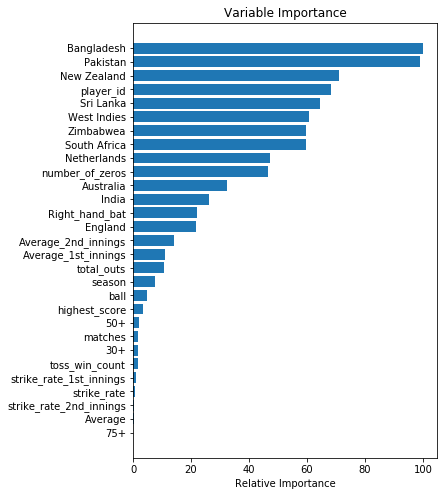

In [652]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = gb.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
GridSearchCV

In [520]:
param_grid = {'learning_rate': [0.01,0.1, 0.05, 0.02],
                  'max_depth': [2, 3],
                  'min_samples_leaf': [3, 5],
              'n_estimators':[1000,5000,10000,50000,100000]
                  }

In [521]:
param_grid

{'learning_rate': [0.01, 0.1, 0.05, 0.02],
 'max_depth': [2, 3],
 'min_samples_leaf': [3, 5],
 'n_estimators': [1000, 5000, 10000, 50000, 100000]}

In [522]:
gs_cv = GridSearchCV(GradientBoostingRegressor(), param_grid, n_jobs=2).fit(X_train, y_train)

In [523]:
gs_cv.best_score_

0.9946892779541024

In [524]:
gs_cv.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_leaf': 3,
 'n_estimators': 50000}

In [530]:
from sklearn.model_selection import KFold


In [546]:
train_1, test_1 = train_and_test(2012, 2013)
train_2, test_2 = train_and_test(2013, 2014)
train_3, test_3 = train_and_test(2014, 2015)
train_4, test_4 = train_and_test(2015, 2016)
train_5, test_5 = train_and_test(2016, 2017)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [531]:
KFold

sklearn.model_selection._split.KFold

In [537]:
from sklearn.cross_validation import cross_val_score, cross_val_predict

In [539]:
cross_val_score(gb,X_train, y_train , cv = 6)

array([0.99753626, 0.9990278 , 0.9982458 , 0.99709274, 0.99747918,
       0.98244739])

In [540]:
grad = GradientBoostingRegressor(learning_rate = 0.05, max_depth= 3, min_samples_leaf= 3, n_estimators= 50000)

In [550]:
X_train_1 = train_1.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_1 = train_1['runs_scored']


X_test_1 = test_1.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_1 = test_1['runs_scored']

In [551]:
X_train_2 = train_2.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_2 = train_2['runs_scored']


X_test_2 = test_2.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_2 = test_2['runs_scored']

In [552]:
X_train_3 = train_3.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_3 = train_3['runs_scored']


X_test_3 = test_3.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_3 = test_3['runs_scored']

In [553]:
X_train_4 = train_4.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_4 = train_4['runs_scored']


X_test_4 = test_4.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_4 = test_4['runs_scored']

In [554]:
X_train_5 = train_5.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_train_5 = train_5['runs_scored']


X_test_5 = test_5.drop(['runs_scored', 'batsman_striker','Batting_hand', 'Bowling_skill', 'DOB'], axis=1)
y_test_5 = test_5['runs_scored']

In [564]:
grad.fit(X_train_1, y_train_1)

y_predict_1 = grad.predict(X_test_1)

score_1 = grad.score(X_test_1, y_test_1)

mse_1 = mean_squared_error( y_test_1, y_predict_1)

print('MSE:{}'.format(mse_1))
print('Score:{}'.format(score_1))

MSE:48687.126376116736
Score:-0.9895065309634673


In [565]:
grad.fit(X_train_2, y_train_2)

y_predict_2 = grad.predict(X_test_2)

score_2 = grad.score(X_test_2, y_test_2)

mse_2 = mean_squared_error( y_test_2, y_predict_2)

print('MSE:{}'.format(mse_2))
print('Score:{}'.format(score_2))

MSE:56505.47963250687
Score:-1.0904615369122612


In [567]:
grad.fit(X_train_3, y_train_3)

y_predict_3 = grad.predict(X_test_3)

score_3 = grad.score(X_test_3, y_test_3)

mse_3 = mean_squared_error( y_test_3, y_predict_3)

print('MSE:{}'.format(mse_3))
print('Score:{}'.format(score_3))

MSE:58127.37607869323
Score:-1.062760745701821


In [568]:
grad.fit(X_train_4, y_train_4)

y_predict_4 = grad.predict(X_test_4)

score_4 = grad.score(X_test_4, y_test_4)

mse_4 = mean_squared_error( y_test_4, y_predict_4)

print('MSE:{}'.format(mse_4))
print('Score:{}'.format(score_4))

MSE:54361.68199762195
Score:-0.9590076618213701


In [573]:
#from sklearn.ensemble import partial_dependence 


In [575]:
X_train.head()

player_id  season  ball  matches  total_outs  highest_score  Average  \
1332        437    2008     3        2         2.0              4     2.00   
119          37    2008   142       10        38.0             45     5.42   
1168        376    2008    60        7        20.0             34     3.50   
907         297    2008     4        3        12.0              3     0.17   
486         162    2008    24        3         3.0             22     7.67   

      strike_rate  Average_1st_innings  strike_rate_1st_innings ...   England  \
1332       133.33                 4.00                   200.00 ...         0   
119        145.07                 7.06                   137.93 ...         0   
1168       116.67                 2.55                    93.33 ...         0   
907         50.00                 0.33                    66.67 ...         0   
486         95.83                 1.00                    33.33 ...         0   

      India  Netherlands  New Zealand  Pakistan  South Africa  Sri Lanka  \
1332      1            0            0         0             0          0   
119       1            0            0         0             0          0   
1168      0            0            0         0             0          0   
907       1            0            0         0             0          0   
486       1            0            0         0             0          0   

      West Indies  Zimbabwea  age  
1332            0          0   24  
119             0          0   25  
1168            0          0   39  
907             0          0   22  
486             0          0   32  

[5 rows x 29 columns]

In [576]:
len(X_train.columns)

29

In [589]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence

In [596]:
train.

Index(['batsman_striker', 'player_id', 'season', 'ball', 'matches',
       'runs_scored', 'total_outs', 'highest_score', 'Average', 'strike_rate',
       'Average_1st_innings', 'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'DOB', 'Batting_hand', 'Bowling_skill', 'Australia',
       'Bangladesh', 'England', 'India', 'Netherlands', 'New Zealand',
       'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwea',
       'age'],
      dtype='object')

In [ ]:
lambda x:x.startswith('Right')

In [615]:
l = []
for value in player.Batting_hand.values:
    if value.startswith('Right'):
        l.append('Right_hand_bat')
    else:
        l.append('Left_hand_bat')

In [619]:
player['Batting_hand']= l

In [621]:
player.Batting_hand.unique()

array(['Left_hand_bat', 'Right_hand_bat'], dtype=object)

In [623]:
pd.get_dummies(player.Batting_hand, drop_first=True)

Right_hand_bat
0                 0
1                 1
2                 1
3                 1
4                 1
5                 1
6                 1
7                 1
8                 1
9                 1
10                1
11                1
12                1
13                1
14                1
15                0
16                0
17                0
18                0
19                1
20                0
21                0
22                1
23                0
24                1
25                0
26                0
27                0
28                0
29                1
..              ...
469               1
470               1
471               0
472               0
473               1
474               0
475               0
476               1
477               1
478               0
479               0
480               0
481               0
482               1
483               0
484               0
485               1
486               1
487               0
488               1
489               1
490               1
491               1
492               0
493               1
494               1
495               1
496               0
0                 0
1                 1

[499 rows x 1 columns]

In [666]:
train.columns

Index(['batsman_striker', 'player_id', 'season', 'ball', 'matches',
       'runs_scored', 'total_outs', 'highest_score', 'Average', 'strike_rate',
       'Average_1st_innings', 'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'toss_win_count', '30+', '50+', '75+',
       'number_of_zeros', 'DOB', 'Bowling_skill', 'Australia', 'Bangladesh',
       'England', 'India', 'Netherlands', 'New Zealand', 'Pakistan',
       'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwea',
       'Right_hand_bat', 'age'],
      dtype='object')

In [681]:
X_train = train.drop(['runs_scored','season','matches','Average','total_outs','ball', 'batsman_striker', 'Bowling_skill','30+','toss_win_count','50+','75+','strike_rate','strike_rate_2nd_innings','strike_rate_1st_innings', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored','season','matches','Average','total_outs','ball', 'batsman_striker', 'Bowling_skill','30+','toss_win_count','50+','75+','strike_rate','strike_rate_2nd_innings','strike_rate_1st_innings', 'DOB'], axis=1)

y_test = test['runs_scored'].values

In [682]:
len(X_train.columns)

18

In [683]:
gb_feat = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000, max_features='sqrt' )

gb_feat.fit(X_train, y_train)

gb_feat_predict = gb_feat.predict(X_test)

gb_feat.score(y_test, X_test)

-1.4513428871991416

In [687]:
gb_feat.score(X_test, y_test)

-1.4513428871991416

In [684]:
mean_squared_error(y_tes, gb_feat_predict)

65462.21579016085

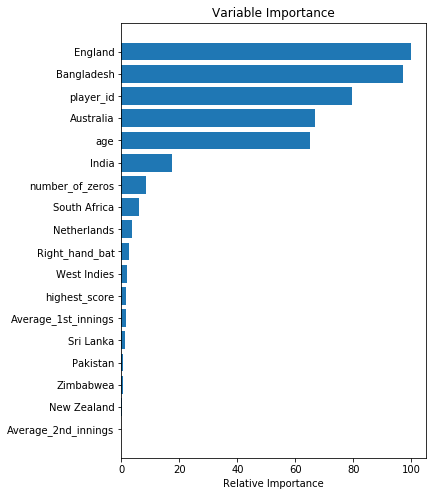

In [685]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = gb_feat.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [709]:
import matplotlib.pyplot as plt

ValueError: x and y must have same first dimension, but have shapes (764,) and (1364,)

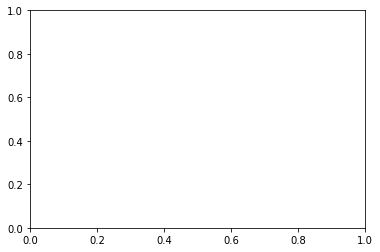

In [712]:
plt.plot(y_test, g_t_predic, '*')

In [716]:
len(g_t_predici)

1364

In [717]:
len(y_test)

764

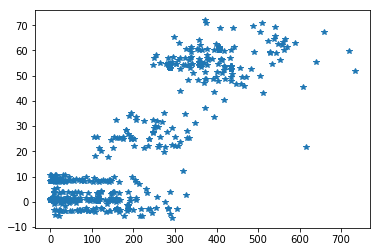

In [736]:
plt.plot(y_test,g_predictiii, '*')

In [718]:
len(g_predicti)

764

In [706]:
len(y_test)

764

In [744]:
train[train.batsman_striker == 'V Kohli']

batsman_striker  player_id  season  ball  matches  runs_scored  \
1273         V Kohli        433    2008   168       12          165   
1274         V Kohli        433    2009   225       13          246   
1275         V Kohli        433    2010   216       13          307   
1276         V Kohli        433    2011   473       16          557   
1277         V Kohli        433    2012   333       15          364   
1278         V Kohli        433    2013   471       16          639   
1279         V Kohli        433    2014   301       14          359   
1280         V Kohli        433    2015   395       16          505   

      total_outs  highest_score  Average  strike_rate ...  India  Netherlands  \
1273        96.0             99     1.72        98.21 ...      1            0   
1274        96.0             99     2.56       109.33 ...      1            0   
1275        96.0             99     3.20       142.13 ...      1            0   
1276        96.0             99     5.80       117.76 ...      1            0   
1277        96.0             99     3.79       109.31 ...      1            0   
1278        96.0             99     6.66       135.67 ...      1            0   
1279        96.0             99     3.74       119.27 ...      1            0   
1280        96.0             99     5.26       127.85 ...      1            0   

      New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwea  \
1273            0         0             0          0            0          0   
1274            0         0             0          0            0          0   
1275            0         0             0          0            0          0   
1276            0         0             0          0            0          0   
1277            0         0             0          0            0          0   
1278            0         0             0          0            0          0   
1279            0         0             0          0            0          0   
1280            0         0             0          0            0          0   

      Right_hand_bat age  
1273               1  20  
1274               1  21  
1275               1  22  
1276               1  23  
1277               1  24  
1278               1  25  
1279               1  26  
1280               1  27  

[8 rows x 34 columns]

In [750]:
len(train.season.unique())

8

In [749]:
len(season)

8

In [751]:
season


array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [754]:
for i in season:
    print(i)

2008
2009
2010
2011
2012
2013
2014
2015


In [991]:
tr, tt = train_and_test(2010,2011)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def test_batting_first(df):


In [759]:
tr[tr.batsman_striker == 'V Kohli']

batsman_striker  player_id  season  ball  matches  runs_scored  \
166         V Kohli        434    2008   168       12          165   
157         V Kohli        434    2009   225       13          246   
166         V Kohli        434    2010   216       13          307   
182         V Kohli        434    2011   473       16          557   
174         V Kohli        434    2012   333       15          364   
172         V Kohli        434    2013   471       16          639   
127         V Kohli        434    2014   301       14          359   
129         V Kohli        434    2015   395       16          505   

     total_outs  highest_score  Average  strike_rate ...  India  Netherlands  \
166        11.0             38    15.00        98.21 ...      1            0   
157        11.0             50    22.36       109.33 ...      1            0   
166        11.0             58    27.91       142.13 ...      1            0   
182        12.0             71    46.42       117.76 ...      1            0   
174        13.0             73    28.00       109.31 ...      1            0   
172        14.0             99    45.64       135.67 ...      1            0   
127        13.0             73    27.62       119.27 ...      1            0   
129        11.0             82    45.91       127.85 ...      1            0   

     New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwea  \
166            0         0             0          0            0          0   
157            0         0             0          0            0          0   
166            0         0             0          0            0          0   
182            0         0             0          0            0          0   
174            0         0             0          0            0          0   
172            0         0             0          0            0          0   
127            0         0             0          0            0          0   
129            0         0             0          0            0          0   

     Right_hand_bat age  
166               1  20  
157               1  21  
166               1  22  
182               1  23  
174               1  24  
172               1  25  
127               1  26  
129               1  27  

[8 rows x 34 columns]

### baseline 

In [993]:
X_train = tr[['player_id', 'Average']] #.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = tr['runs_scored'].values

X_test = tt[['player_id', 'Average']] #.drop(['runs_scored','batsman_striker', 'Bowling_skill', 'DOB'], axis= 1)
y_test = tt['runs_scored'].values

In [994]:
grad_boost = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)
grad_boost.fit(X_train, y_train)
y_pred = grad_boost.predict(X_test)





In [995]:
grad_boost.score(X_test, y_test)

0.17732638857610716

In [996]:
mean_squared_error(y_test, y_pred)

110627.1213497795

In [989]:
X_train = baseline['player_id']#.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = baseline['runs_scored'].values

X_test = baseline['player_id']  #.drop(['runs_scored','batsman_striker', 'Bowling_skill', 'DOB'], axis= 1)
y_test = baseline['runs_scored'].values

In [982]:
y_bpred = g.predict(X_test)


score_gb = g.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_bpred)

print('MSE:{}'.format(mse_gb))
print('Score:{}'.format(score_gb))

MSE:103750.8335823599
Score:-0.21414578571335308


In [985]:
baseline = tr[(tr.season==2008)|(tr.season==2009)| (tr.season==2010)]

In [986]:
baseline = baseline[['batsman_striker', 'player_id', 'season', 'runs_scored']]

In [987]:
baseline_test = tr[tr.season==2011]

In [988]:
baseline_test = baseline_test[['batsman_striker', 'player_id', 'season', 'runs_scored']]

In [806]:
b_2009 = baseline[baseline.season==2009]

In [807]:
b_2010 = baseline[baseline.season==2010]

In [801]:
pred = combined.runs_scored_x

In [802]:
act = combined.runs_scored_y

In [803]:
mean_squared_error(act, pred)

41579.69736842105

In [808]:
combined_09_10 = b_2009.merge(b_2010, on=  ['player_id', 'batsman_striker'], how='inner')

In [810]:
combined_09_10['actual']= (combined_09_10.runs_scored_x +combined_09_10.runs_scored_y)/2

In [812]:
b_2011 = baseline[baseline.season==2011]

In [814]:
combined_09_10_11 = combined_09_10.merge(b_2011, on=  ['player_id', 'batsman_striker'], how='inner')

In [819]:
prediction = combined_09_10_11.actual

In [820]:
actual = combined_09_10_11.runs_scored

In [821]:
mean_squared_error(actual, prediction)

51445.14224137931

In [816]:
combined_09_10_11

batsman_striker  player_id  season_x  runs_scored_x  season_y  \
0             R Dravid        311      2009            271      2010   
1        R Vinay Kumar        319      2009             47      2010   
2     RE van der Merwe        324      2009            122      2010   
3            RG Sharma        326      2009            362      2010   
4            RJ Harris        327      2009             21      2010   
5             RP Singh        331      2009              8      2010   
6             RR Powar        334      2009             23      2010   
7           RV Uthappa        343      2009            175      2010   
8          S Badrinath        348      2009            177      2010   
9             S Dhawan        350      2009             40      2010   
10         S Sreesanth        360      2009              5      2010   
11            R Bhatia        308      2009              8      2010   
12            R Ashwin        307      2009              8      2010   
13          MV Boucher        265      2009            150      2010   
14             NV Ojha        283      2009            168      2010   
15         SA Asnodkar        365      2009             98      2010   
16             P Kumar        288      2009             65      2010   
17            PA Patel        292      2009            142      2010   
18           PP Chawla        299      2009             31      2010   
19             MS Gony        263      2009             13      2010   
20            TL Suman        422      2009            237      2010   
21          TM Dilshan        423      2009            418      2010   
22             V Kohli        434      2009            246      2010   
23            V Sehwag        436      2009            198      2010   
24          VVS Laxman        443      2009             19      2010   
25             WP Saha        449      2009             72      2010   
26             Y Nagar        454      2009             20      2010   
27     Y Venugopal Rao        455      2009            124      2010   
28           YK Pathan        457      2009            261      2010   
29           SS Tiwary        396      2009             13      2010   
...                ...        ...       ...            ...       ...   
1072         A Symonds         14      2009            249      2010   
1073        AB Agarkar         21      2009             66      2010   
1074          AB Dinda         23      2009              2      2010   
1075    AB de Villiers         25      2009            465      2010   
1076      AC Gilchrist         27      2009            495      2010   
1077          AM Nayar         40      2009            193      2010   
1078           AS Raut         50      2009             78      2010   
1079       AB McDonald         24      2009              3      2010   
1080          L Balaji        216      2009              4      2010   
1081         LR Shukla        224      2009             83      2010   
1082       LRPL Taylor        225      2009            280      2010   
1083          M Kartik        228      2009             21      2010   
1084          M Manhas        230      2009             75      2010   
1085          M Morkel        231      2009              8      2010   
1086    M Muralitharan        232      2009              8      2010   
1087           M Vijay        235      2009             60      2010   
1088         MK Pandey        252      2009            168      2010   
1089         MK Tiwary        253      2009              9      2010   
1090         G Gambhir        140      2009            286      2010   
1091          GC Smith        142      2009            212      2010   
1092   Harbhajan Singh        154      2009             84      2010   
1093          I Sharma        158      2009             16      2010   
1094         IK Pathan        160      2009            196      2010   
1095          DW Steyn        133      2009    

In [890]:
all_df = concating_dataframes('../../capstone_project/ipl_csv/Data/trial/')

In [892]:
all_df[all_df.season==2011]

over_ball                 batting_team  batsman_striker  \
55455        0.1          Chennai Super Kings       S Anirudha   
55456        0.2          Chennai Super Kings       S Anirudha   
55457        0.3          Chennai Super Kings          M Vijay   
55458        0.4          Chennai Super Kings          M Vijay   
55459        0.5          Chennai Super Kings          M Vijay   
55460        0.6          Chennai Super Kings          M Vijay   
55461        1.1          Chennai Super Kings       S Anirudha   
55462        1.2          Chennai Super Kings         SK Raina   
55463        1.3          Chennai Super Kings         SK Raina   
55464        1.4          Chennai Super Kings         SK Raina   
55465        1.5          Chennai Super Kings         SK Raina   
55466        1.6          Chennai Super Kings       S Anirudha   
55467        2.1          Chennai Super Kings         SK Raina   
55468        2.2          Chennai Super Kings       S Anirudha   
55469        2.3          Chennai Super Kings       S Anirudha   
55470        2.4          Chennai Super Kings       S Anirudha   
55471        2.5          Chennai Super Kings         SK Raina   
55472        2.6          Chennai Super Kings       S Anirudha   
55473        3.1          Chennai Super Kings         SK Raina   
55474        3.2          Chennai Super Kings       S Anirudha   
55475        3.3          Chennai Super Kings       S Anirudha   
55476        3.4          Chennai Super Kings       S Anirudha   
55477        3.5          Chennai Super Kings       S Anirudha   
55478        3.6          Chennai Super Kings         SK Raina   
55479        3.7          Chennai Super Kings       S Anirudha   
55480        4.1          Chennai Super Kings         SK Raina   
55481        4.2          Chennai Super Kings         SK Raina   
55482        4.3          Chennai Super Kings         SK Raina   
55483        4.4          Chennai Super Kings         SK Raina   
55484        4.5          Chennai Super Kings         SK Raina   
...          ...                          ...              ...   
72438       15.2  Royal Challengers Bangalore        SS Tiwary   
72439       15.3  Royal Challengers Bangalore           Z Khan   
72440       15.4  Royal Challengers Bangalore           Z Khan   
72441       15.5  Royal Challengers Bangalore           Z Khan   
72442       15.6  Royal Challengers Bangalore           Z Khan   
72443       16.1  Royal Challengers Bangalore        SS Tiwary   
72444       16.2  Royal Challengers Bangalore           Z Khan   
72445       16.3  Royal Challengers Bangalore        SS Tiwary   
72446       16.4  Royal Challengers Bangalore        SS Tiwary   
72447       16.5  Royal Challengers Bangalore           Z Khan   
72448       16.6  Royal Challengers Bangalore           Z Khan   
72449       17.1  Royal Challengers Bangalore           Z Khan   
72450       17.2  Royal Challengers Bangalore           Z Khan   
72451       17.3  Royal Challengers Bangalore           Z Khan   
72452       17.4  Royal Challengers Bangalore           Z Khan   
72453       17.5  Royal Challengers Bangalore           Z Khan   
72454       17.6  Royal Challengers Bangalore        SS Tiwary   
72455       18.1  Royal Challengers Bangalore        SS Tiwary   
72456       18.2  Royal Challengers Bangalore           Z Khan   
72457       18.3  Royal Challengers Bangalore           Z Khan   
72458       18.4  Royal Challengers Bangalore           Z Khan   
72459       18.5  Royal Challengers Bangalore  J Syed Mohammad   
72460       18.6  Royal Challengers Bangalore  J Syed Mohammad   
72461       18.7  Royal Challengers Bangalore        SS Tiwary   
72462       19.1  Royal Challengers Bangalore        SS Tiwary   
72463       19.2  Royal Challengers Bangalore        SS Tiwary   
72464       19.3  Royal Challengers Bangalore        SS Tiwary   
72465       19.4  Royal Challengers Bangalore        SS Tiwary   
72466       19.5  Royal Challengers Bangalore  

In [1004]:
train, test = train_and_test(2010, 2011)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def test_batting_first(df):


In [1005]:
test.season.unique()

array([2008., 2009., 2010.])

In [1006]:
test[test.batsman_striker == 'V Kohli']

batsman_striker  player_id  ball  matches  runs_scored  total_outs  \
450         V Kohli        433   609       38          718        33.0   
451         V Kohli        433   609       38          718        33.0   
452         V Kohli        433   609       38          718        33.0   

     highest_score  Average  strike_rate  Average_1st_innings  \
450             58    21.76        117.9                20.73   
451             58    21.76        117.9                20.73   
452             58    21.76        117.9                20.73   

     strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
450                   107.61                22.61                   127.19   
451                   107.61                22.61                   127.19   
452                   107.61                22.61                   127.19   

     season  toss_win_count  30+  50+  75+  number_of_zeros        DOB  \
450  2008.0             5.0  7.0  2.0  0.0              1.0  11/5/1988   
451  2009.0             7.0  7.0  2.0  0.0              1.0  11/5/1988   
452  2010.0             4.0  7.0  2.0  0.0              1.0  11/5/1988   

        Bowling_skill  Australia  Bangladesh  England  India  Netherlands  \
450  Right-arm medium          0           0        0      1            0   
451  Right-arm medium          0           0        0      1            0   
452  Right-arm medium          0           0        0      1            0   

     New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwea  \
450            0         0             0          0            0          0   
451            0         0             0          0            0          0   
452            0         0             0          0            0          0   

     Right_hand_bat   age  
450               1  20.0  
451               1  21.0  
452               1  22.0

In [972]:
test.head()

batsman_striker  player_id  ball  matches  runs_scored  total_outs  \
0        A Chopra          3    75        6           53         6.0   
1        A Chopra          3    75        6           53         6.0   
2      A Flintoff          5    57        3           62         2.0   
3        A Kumble          6    49       15           35         3.0   
4        A Kumble          6    49       15           35         3.0   

   highest_score  Average  strike_rate  Average_1st_innings  \
0             24     8.83        70.67                 10.2   
1             24     8.83        70.67                 10.2   
2             24    31.00       108.77                  0.0   
3              8    11.67        71.43                  5.5   
4              8    11.67        71.43                  5.5   

   strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
0                    70.83                  2.0                    66.67   
1                    70.83                  2.0                    66.67   
2                   157.14                 20.0                    93.02   
3                    68.75                 24.0                    72.73   
4                    68.75                 24.0                    72.73   

   season  toss_win_count  30+  50+  75+  number_of_zeros         DOB  \
0  2008.0             3.0  0.0  0.0  0.0              0.0   9/19/1977   
1  2009.0             1.0  0.0  0.0  0.0              0.0   9/19/1977   
2  2009.0             2.0  0.0  0.0  0.0              0.0   12/6/1977   
3  2008.0             3.0  0.0  0.0  0.0              1.0  10/17/1970   
4  2009.0             3.0  0.0  0.0  0.0              1.0  10/17/1970   

           Bowling_skill  Australia  Bangladesh  England  India  Netherlands  \
0     Right-arm offbreak          0           0        0      1            0   
1     Right-arm offbreak          0           0        0      1            0   
2  Right-arm fast-medium          0           0        1      0            0   
3        Legbreak googly          0           0        0      1            0   
4        Legbreak googly          0           0        0      1            0   

   New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwea  \
0            0         0             0          0            0          0   
1            0         0             0          0            0          0   
2            0         0             0          0            0          0   
3            0         0             0          0            0          0   
4            0         0             0          0            0          0   

   Right_hand_bat   age  
0               1  31.0  
1               1  32.0  
2               1  32.0  
3               1  38.0  
4               1  39.0

In [1007]:
test.drop_duplicates('batsman_striker', inplace = True)

In [1009]:
X_train = train.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored','batsman_striker', 'Bowling_skill', 'DOB'], axis= 1)
y_test = test['runs_scored'].values

In [1010]:
gr = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)
gr.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1012]:
y_pred = gra.predict(X_test)


gr_s = gra.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:112800.71345181324


In [832]:
len(X_train.columns)

30

In [833]:
len(X_test.columns)

30

In [997]:
train, test = train_and_test(2016, 2017)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def test_batting_first(df):


In [1024]:
train[train.batsman_striker=='V Kohli']

batsman_striker  player_id  season  ball  matches  runs_scored  \
166         V Kohli        433    2008   168       12          165   
157         V Kohli        433    2009   225       13          246   
166         V Kohli        433    2010   216       13          307   
182         V Kohli        433    2011   473       16          557   
174         V Kohli        433    2012   333       15          364   
172         V Kohli        433    2013   471       16          639   
127         V Kohli        433    2014   301       14          359   
129         V Kohli        433    2015   395       16          505   
138         V Kohli        433    2016   655       16          973   

     total_outs  highest_score  Average  strike_rate  Average_1st_innings  \
166        11.0             38    15.00        98.21                19.33   
157        11.0             50    22.36       109.33                15.40   
166        11.0             58    27.91       142.13                29.50   
182        12.0             71    46.42       117.76                46.00   
174        13.0             73    28.00       109.31                35.17   
172        14.0             99    45.64       135.67                44.40   
127        13.0             73    27.62       119.27                29.83   
129        11.0             82    45.91       127.85                36.00   
138        12.0            113    81.08       148.55                74.22   

     strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
166                    91.34                 9.80                   119.51   
157                    96.25                28.17                   116.55   
166                   143.90                27.00                   141.04   
182                   121.05                46.62                   116.20   
174                   115.93                21.86                   101.32   
172                   133.73                48.75                   140.29   
127                   125.17                25.71                   113.92   
129                   116.13                54.17                   135.42   
138                   149.78               101.67                   145.93   

     toss_win_count  30+  50+  75+  number_of_zeros        DOB  \
166             5.0  2.0  0.0  0.0              1.0  11/5/1988   
157             7.0  1.0  1.0  0.0              0.0  11/5/1988   
166             4.0  4.0  1.0  0.0              0.0  11/5/1988   
182             6.0  5.0  4.0  0.0              0.0  11/5/1988   
174             6.0  3.0  2.0  0.0              0.0  11/5/1988   
172             5.0  2.0  5.0  2.0              0.0  11/5/1988   
127             9.0  4.0  2.0  0.0              3.0  11/5/1988   
129            10.0  6.0  2.0  1.0              0.0  11/5/1988   
138             6.0  1.0  3.0  8.0              1.0  11/5/1988   

        Bowling_skill  Australia  Bangladesh  England  India  Netherlands  \
166  Right-arm medium          0           0        0      1            0   
157  Right-arm medium          0           0        0      1            0   
166  Right-arm medium          0           0        0      1            0   
182  Right-arm medium          0           0        0      1            0   
174  Right-arm medium          0           0        0      1            0   
172  Right-arm medium          0           0        0      1            0   
127  Right-arm medium          0           0        0      1            0   
129  Right-arm medium          0           0        0      1            0   
138  Right-arm medium          0           0        0      1            0   

     New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwea  \
166            0         0             0          0            0          0   
157            0         0             0          0            0          0   
166            0         0             0          0            0          0   
182

In [ ]:
train.ba

In [1013]:
train, test = train_and_test(2016, 2017)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def test_batting_first(df):


In [1020]:
train = train[(train.season!=2008)|(train.season!=2009)|(train.season!=2010)]

In [1017]:
test.head()

batsman_striker  player_id  ball  matches  runs_scored  total_outs  \
0  A Ashish Reddy          2   196       23          280        15.0   
4      A Chandila          3     7        2            4         0.0   
5        A Chopra          4    75        6           53         6.0   
7      A Flintoff          6    57        3           62         2.0   
8        A Kumble          7    49       15           35         3.0   

   highest_score  Average  strike_rate  Average_1st_innings  \
0             36    18.67       142.86                23.71   
4              4     0.00        57.14                 0.00   
5             24     8.83        70.67                10.20   
7             24    31.00       108.77                 0.00   
8              8    11.67        71.43                 5.50   

   strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
0                   144.35                14.25                   140.74   
4                    57.14                 0.00                     0.00   
5                    70.83                 2.00                    66.67   
7                   157.14                20.00                    93.02   
8                    68.75                24.00                    72.73   

   season  toss_win_count  30+  50+  75+  number_of_zeros         DOB  \
0  2012.0             1.0  2.0  0.0  0.0              0.0   2/24/1991   
4  2012.0             1.0  0.0  0.0  0.0              1.0   12/5/1983   
5  2008.0             3.0  0.0  0.0  0.0              0.0   9/19/1977   
7  2009.0             2.0  0.0  0.0  0.0              0.0   12/6/1977   
8  2008.0             3.0  0.0  0.0  0.0              1.0  10/17/1970   

           Bowling_skill  Australia  Bangladesh  England  India  Netherlands  \
0       Right-arm medium          0           0        0      1            0   
4     Right-arm offbreak          0           0        0      1            0   
5     Right-arm offbreak          0           0        0      1            0   
7  Right-arm fast-medium          0           0        1      0            0   
8        Legbreak googly          0           0        0      1            0   

   New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwea  \
0            0         0             0          0            0          0   
4            0         0             0          0            0          0   
5            0         0             0          0            0          0   
7            0         0             0          0            0          0   
8            0         0             0          0            0          0   

   Right_hand_bat   age  
0               1  20.0  
4               1  29.0  
5               1  31.0  
7               1  32.0  
8               1  38.0

In [1021]:
X_train = train.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored','batsman_striker', 'Bowling_skill', 'DOB'], axis= 1)
y_test = test['runs_scored'].values

In [1022]:
gbooster = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)
gbooster.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1023]:
y_pred = gbooster.predict(X_test)


gr_s = gbooster.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:640765.4966251191


In [1026]:
from sklearn.metrics import r2_score

In [1027]:
r2_score( y_test, y_pred)

-0.18031395720628196

In [1025]:
train

batsman_striker  player_id  season  ball  matches  runs_scored  \
0                A Chopra          4    2008    55        5           42   
116             RG Sharma        325    2008   276       12          404   
117              RP Singh        330    2008    25        9           27   
118              RR Powar        333    2008    21        1           28   
119               RR Raje        334    2008     9        3            8   
120             RR Sarwan        336    2008    78        4           73   
121            RT Ponting        340    2008    53        4           39   
122            RV Uthappa        342    2008   291       14          320   
123            S Anirudha        344    2008     8        1            1   
115             RA Jadeja        319    2008   108        9          135   
124           S Badrinath        347    2008   138       11          192   
126              S Dhawan        349    2008   308       14          340   
127               S Sohal        358    2008     8        2            4   
128           S Sreesanth        359    2008     3        2            0   
129              S Vidyut        362    2008   115        8          145   
130           SA Asnodkar        364    2008   241        9          311   
131             SB Bangar        366    2008    49        6           47   
132              SB Joshi        368    2008    16        2            6   
133             SB Styris        369    2008   124        8          112   
125         S Chanderpaul        348    2008    33        3           25   
114         R Vinay Kumar        318    2008    28        4           25   
113              R Dravid        310    2008   299       14          371   
112              R Bhatia        307    2008    28        3           34   
93          Misbah-ul-Haq        267    2008    82        8          117   
94          Mohammad Asif        269    2008     6        2            3   
95        Mohammad Hafeez        270    2008    84        8           64   
96            Niraj Patel        283    2008    83        4          103   
97            Niraj Patel        283    2008    83        4          103   
98            Niraj Patel        283    2008    83        4          103   
99            Niraj Patel        283    2008    83        4          103   
100           Niraj Patel        283    2008    83        4          103   
101           Niraj Patel        283    2008    83        4          103   
102           Niraj Patel        283    2008    83        4          103   
103           Niraj Patel        283    2008    83        4          103   
104               P Kumar        287    2008   100       12          112   
105              PA Patel        291    2008   315       13          302   
106            PJ Sangwan        296    2008     5        2            2   
107      PM Sarvesh Kumar        297    2008     2        1            1   
108             PP Chawla        298    2008    61        7           90   
109               PP Ojha        299    2008     4        3            2   
110               PR Shah        300    2008    38        4           34   
111          Pankaj Singh        303    2008     8        2            5   
134            SC Ganguly        371    2008   324       13          349   
135            SC Ganguly        371    2008   324       13          349   
136            SC Ganguly        371    2008   324       13          349   
137            SC Ganguly        371    2008   324       13          349   
161               T Taibu        416    2008    26        3           31   
162            TM Dilshan        422    2008    79        7          104   
163         TM Srivastava        424    2008    10        2            8   
164                U Kaul        427    2008     1        1            0   
165              Umar Gul        432    2008    19        4           39   
166               V Kohli        433    2008   168       1

In [1029]:
hussey = train[train.batsman_striker=='MEK Hussey']

In [1040]:
hussey['new_avg']= hussey.runs_scored / hussey.matches

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [1041]:
hussey.head()

batsman_striker  player_id  season  ball  matches  runs_scored  \
84       MEK Hussey        244    2008   100        3          168   
92       MEK Hussey        244    2010    44        3           37   
99       MEK Hussey        244    2011   423       14          492   
103      MEK Hussey        244    2012   241        8          261   
99       MEK Hussey        244    2013   580       17          733   

     total_outs  highest_score  Average  strike_rate  Average_1st_innings  \
84          2.0            116    84.00       168.00                84.00   
92          2.0             15    18.50        84.09                18.50   
99         12.0             83    41.00       116.31                40.33   
103         8.0             56    32.62       108.30                29.60   
99         14.0             95    52.36       126.38                69.83   

     strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
84                    168.00                 0.00                     0.00   
92                     84.09                 0.00                     0.00   
99                    117.86                43.00                   112.17   
103                   108.82                37.67                   107.62   
99                    130.94                39.25                   120.77   

     toss_win_count  30+  50+  75+  number_of_zeros        DOB  \
84              2.0  1.0  0.0  1.0              0.0  5/27/1975   
92              3.0  0.0  0.0  0.0              0.0  5/27/1975   
99              8.0  4.0  2.0  2.0              1.0  5/27/1975   
103             5.0  2.0  2.0  0.0              0.0  5/27/1975   
99              8.0  4.0  2.0  4.0              0.0  5/27/1975   

        Bowling_skill  Australia  Bangladesh  England  India  Netherlands  \
84   Right-arm medium          1           0        0      0            0   
92   Right-arm medium          1           0        0      0            0   
99   Right-arm medium          1           0        0      0            0   
103  Right-arm medium          1           0        0      0            0   
99   Right-arm medium          1           0        0      0            0   

     New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwea  \
84             0         0             0          0            0          0   
92             0         0             0          0            0          0   
99             0         0             0          0            0          0   
103            0         0             0          0            0          0   
99             0         0             0          0            0          0   

     Right_hand_bat  age    new_avg  
84                0   33  56.000000  
92                0   35  12.333333  
99                0   36  35.142857  
103               0   37  32.625000  
99                0   38  43.117647

In [1032]:
train[train.batsman_striker =='RA Jadeja']

batsman_striker  player_id  season  ball  matches  runs_scored  \
115       RA Jadeja        319    2008   108        9          135   
112       RA Jadeja        319    2009   276       13          295   
131       RA Jadeja        319    2011   234       12          283   
132       RA Jadeja        319    2012   153       14          191   
137       RA Jadeja        319    2013   139       14          201   
101       RA Jadeja        319    2014   113       10          146   
99        RA Jadeja        319    2015   128       11          132   
108       RA Jadeja        319    2016   189       15          191   

     total_outs  highest_score  Average  strike_rate  Average_1st_innings  \
115         7.0             36    19.29       125.00                17.25   
112        11.0             42    26.82       106.88                27.60   
131         9.0             47    31.44       120.94                28.17   
132        12.0             48    15.92       124.84                15.10   
137         8.0             38    25.12       144.60                56.00   
101         5.0             36    29.20       129.20                79.00   
99          7.0             24    18.86       103.12                14.67   
108         9.0             36    21.22       101.06                23.50   

     strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
115                   138.00                22.00                   113.79   
112                   122.12                26.17                    96.32   
131                   117.36                38.00                   126.67   
132                   120.80                20.00                   142.86   
137                   133.33                20.71                   149.48   
101                   129.51                16.75                   128.85   
99                     90.72                44.00                   141.94   
108                   108.05                19.40                    95.10   

     toss_win_count  30+  50+  75+  number_of_zeros        DOB  \
115             6.0  2.0  0.0  0.0              2.0  12/6/1988   
112             4.0  4.0  0.0  0.0              0.0  12/6/1988   
131             6.0  2.0  0.0  0.0              0.0  12/6/1988   
132             5.0  2.0  0.0  0.0              0.0  12/6/1988   
137             4.0  2.0  0.0  0.0              2.0  12/6/1988   
101             6.0  1.0  0.0  0.0              0.0  12/6/1988   
99              6.0  0.0  0.0  0.0              1.0  12/6/1988   
108             7.0  1.0  0.0  0.0              1.0  12/6/1988   

              Bowling_skill  Australia  Bangladesh  England  India  \
115  Slow left-arm orthodox          0           0        0      1   
112  Slow left-arm orthodox          0           0        0      1   
131  Slow left-arm orthodox          0           0        0      1   
132  Slow left-arm orthodox          0           0        0      1   
137  Slow left-arm orthodox          0           0        0      1   
101  Slow left-arm orthodox          0           0        0      1   
99   Slow left-arm orthodox          0           0        0      1   
108  Slow left-arm orthodox          0           0        0      1   

     Netherlands  New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  \
115            0            0         0             0          0            0   
112            0            0         0             0          0            0   
131            0            0         0             0          0            0   
132            0            0         0             0          0            0   
137            0            0         0             0          0            0   
101            0            0         0             0          0            0   
99             0            0         0             0          0            0   
108            0            0         0             0          0            0   

     Zimbabwea  Righ

In [1033]:
train[train.India == 1]

batsman_striker  player_id  season  ball  matches  runs_scored  \
0                A Chopra          4    2008    55        5           42   
116             RG Sharma        325    2008   276       12          404   
117              RP Singh        330    2008    25        9           27   
118              RR Powar        333    2008    21        1           28   
119               RR Raje        334    2008     9        3            8   
122            RV Uthappa        342    2008   291       14          320   
123            S Anirudha        344    2008     8        1            1   
115             RA Jadeja        319    2008   108        9          135   
124           S Badrinath        347    2008   138       11          192   
126              S Dhawan        349    2008   308       14          340   
127               S Sohal        358    2008     8        2            4   
128           S Sreesanth        359    2008     3        2            0   
129              S Vidyut        362    2008   115        8          145   
130           SA Asnodkar        364    2008   241        9          311   
131             SB Bangar        366    2008    49        6           47   
132              SB Joshi        368    2008    16        2            6   
114         R Vinay Kumar        318    2008    28        4           25   
113              R Dravid        310    2008   299       14          371   
112              R Bhatia        307    2008    28        3           34   
96            Niraj Patel        283    2008    83        4          103   
97            Niraj Patel        283    2008    83        4          103   
98            Niraj Patel        283    2008    83        4          103   
99            Niraj Patel        283    2008    83        4          103   
100           Niraj Patel        283    2008    83        4          103   
101           Niraj Patel        283    2008    83        4          103   
102           Niraj Patel        283    2008    83        4          103   
103           Niraj Patel        283    2008    83        4          103   
104               P Kumar        287    2008   100       12          112   
105              PA Patel        291    2008   315       13          302   
106            PJ Sangwan        296    2008     5        2            2   
107      PM Sarvesh Kumar        297    2008     2        1            1   
108             PP Chawla        298    2008    61        7           90   
109               PP Ojha        299    2008     4        3            2   
110               PR Shah        300    2008    38        4           34   
111          Pankaj Singh        303    2008     8        2            5   
134            SC Ganguly        371    2008   324       13          349   
135            SC Ganguly        371    2008   324       13          349   
136            SC Ganguly        371    2008   324       13          349   
137            SC Ganguly        371    2008   324       13          349   
163         TM Srivastava        424    2008    10        2            8   
164                U Kaul        427    2008     1        1            0   
166               V Kohli        433    2008   168       12          165   
167              V Sehwag        435    2008   229       14          406   
168             VRV Singh        439    2008     3        2            4   
169           VS Yeligati        441    2008     2        1            2   
170            VVS Laxman        442    2008   134        6          155   
171             VY Mahesh        443    2008    28        5           15   
172              W Jaffer        445    2008   110        6          115   
173               WA Mota        446    2008    28        2           26   
174               WP Saha        448    2008   119       10          159   
176       Y Venugopal Rao        454    2008   217       10          288   
177             YK Pathan        456    2008   253       1

In [1034]:
train[train.batsman_striker =='AM Nayar']

batsman_striker  player_id  season  ball  matches  runs_scored  total_outs  \
12        AM Nayar         39    2008   142       10          206         8.0   
15        AM Nayar         39    2009   155       11          193         9.0   
19        AM Nayar         39    2010    51        3           58         2.0   
17        AM Nayar         39    2011    67        9           61         7.0   
19        AM Nayar         39    2012    49        4           45         3.0   
17        AM Nayar         39    2013    74        9           66         6.0   
5         AM Nayar         39    2014    50        4           43         3.0   

    highest_score  Average  strike_rate  Average_1st_innings  \
12             45    25.75       145.07                20.00   
15             35    21.44       124.52                26.40   
19             27    29.00       113.73                31.00   
17             17     8.71        91.04                 4.33   
19             24    15.00        91.84                 0.00   
17             25    11.00        89.19                38.00   
5              23    14.33        86.00                23.00   

    strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
12                   137.93                43.00                   156.36   
15                   121.10                15.25                   132.61   
19                   124.00                27.00                   103.85   
17                    56.52                12.00                   109.09   
19                     0.00                15.00                    91.84   
17                    88.37                 5.60                    90.32   
5                    109.52                10.00                    68.97   

    toss_win_count  30+  50+  75+  number_of_zeros        DOB  \
12             5.0  3.0  0.0  0.0              0.0  10/8/1983   
15             5.0  3.0  0.0  0.0              0.0  10/8/1983   
19             1.0  0.0  0.0  0.0              0.0  10/8/1983   
17             7.0  0.0  0.0  0.0              2.0  10/8/1983   
19             2.0  0.0  0.0  0.0              0.0  10/8/1983   
17             5.0  0.0  0.0  0.0              2.0  10/8/1983   
5              3.0  0.0  0.0  0.0              0.0  10/8/1983   

       Bowling_skill  Australia  Bangladesh  England  India  Netherlands  \
12  Right-arm medium          0           0        0      1            0   
15  Right-arm medium          0           0        0      1            0   
19  Right-arm medium          0           0        0      1            0   
17  Right-arm medium          0           0        0      1            0   
19  Right-arm medium          0           0        0      1            0   
17  Right-arm medium          0           0        0      1            0   
5   Right-arm medium          0           0        0      1            0   

    New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwea  \
12            0         0             0          0            0          0   
15            0         0             0          0            0          0   
19            0         0             0          0            0          0   
17            0         0             0          0            0          0   
19            0         0             0          0            0          0   
17            0         0             0          0            0          0   
5             0         0             0          0            0          0   

    Right_hand_bat  age  
12               0   25  
15               0   26  
19               0   27  
17               0   28  
19               0   29  
17               0   30  
5                0   31

In [1035]:
train[train.batsman_striker == 'SK Raina']

batsman_striker  player_id  season  ball  matches  runs_scored  \
144        SK Raina        376    2008   304       14          421   
139        SK Raina        376    2009   318       14          434   
151        SK Raina        376    2010   387       16          528   
164        SK Raina        376    2011   335       16          438   
158        SK Raina        376    2012   335       18          441   
153        SK Raina        376    2013   370       17          548   
114        SK Raina        376    2014   370       16          523   
113        SK Raina        376    2015   319       17          374   
119        SK Raina        376    2016   321       15          399   

     total_outs  highest_score  Average  strike_rate  Average_1st_innings  \
144        11.0             55    38.27       138.49                27.22   
139        14.0             98    31.00       136.48                35.20   
151        12.0             83    44.00       136.43                43.83   
164        14.0             73    31.29       130.75                22.08   
158        17.0             73    25.94       131.64                26.50   
153        13.0            100    42.15       148.11               106.50   
114        13.0             87    40.23       141.35                41.00   
113        15.0             62    24.93       117.24                19.45   
119        14.0             75    28.50       124.30                20.50   

     strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
144                   138.42                88.00                   138.58   
139                   136.43                20.50                   136.67   
151                   128.29                44.17                   145.60   
164                   131.84                86.50                   129.10   
158                   138.26                24.60                   117.14   
153                   156.62                13.56                   124.49   
114                   120.59                39.57                   166.87   
113                   111.46                40.00                   125.98   
119                   121.78                34.50                   125.45   

     toss_win_count  30+  50+  75+  number_of_zeros         DOB  \
144             5.0  4.0  3.0  0.0              0.0  11/27/1986   
139             7.0  4.0  1.0  1.0              0.0  11/27/1986   
151            10.0  3.0  2.0  2.0              0.0  11/27/1986   
164             9.0  3.0  4.0  0.0              1.0  11/27/1986   
158             7.0  4.0  1.0  0.0              2.0  11/27/1986   
153             7.0  3.0  2.0  3.0              3.0  11/27/1986   
114            10.0  3.0  4.0  1.0              0.0  11/27/1986   
113            10.0  2.0  2.0  0.0              1.0  11/27/1986   
119             7.0  1.0  2.0  1.0              0.0  11/27/1986   

          Bowling_skill  Australia  Bangladesh  England  India  Netherlands  \
144  Right-arm offbreak          0           0        0      1            0   
139  Right-arm offbreak          0           0        0      1            0   
151  Right-arm offbreak          0           0        0      1            0   
164  Right-arm offbreak          0           0        0      1            0   
158  Right-arm offbreak          0           0        0      1            0   
153  Right-arm offbreak          0           0        0      1            0   
114  Right-arm offbreak          0           0        0      1            0   
113  Right-arm offbreak          0           0        0      1            0   
119  Right-arm offbreak          0           0        0      1            0   

     New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  Zimbabwea  \
144            0         0             0          0            0          0   
139            0         0             0          0            0          0   
151            0         0             0          0 

In [1164]:
trial, test = train_and_test(2017,2017)


/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def test_batting_first(df):


In [1048]:
trial.batsman_striker.unique()

array(['A Choudhary', 'NV Ojha', 'P Kumar', 'P Negi', 'PA Patel',
       'PJ Cummins', 'PJ Sangwan', 'NM Coulter-Nile', 'PP Chawla',
       'R Tewatia', 'RA Jadeja', 'RA Tripathi', 'RD Chahar', 'RG Sharma',
       'RR Pant', 'R Bhatia', 'N Rana', 'Mohammed Shami', 'Mohammad Nabi',
       'LMP Simmons', 'M Vohra', 'MA Agarwal', 'MC Henriques',
       'MG Johnson', 'MJ Guptill', 'MJ McClenaghan', 'MK Pandey',
       'MK Tiwary', 'MM Patel', 'MM Sharma', 'MN Samuels', 'MP Stoinis',
       'MS Dhoni', 'Mandeep Singh', 'RV Uthappa', 'Rashid Khan',
       'S Aravind', 'S Badree', 'Shakib Al Hasan', 'Swapnil Singh',
       'TA Boult', 'TG Southee', 'TM Head', 'TS Mills', 'UT Yadav',
       'V Kohli', 'V Shankar', 'VR Aaron', 'Vishnu Vinod', 'WP Saha',
       'Washington Sundar', 'YK Pathan', 'YS Chahal', 'Sandeep Sharma',
       'LH Ferguson', 'Sachin Baby', 'SV Samson', 'S Dhawan', 'S Kaul',
       'S Nadeem', 'SA Yadav', 'SE Marsh', 'SK Raina', 'SL Malinga',
       'SN Thakur', 'SP Jackson'

In [1049]:
players = ['RG Sharma',  'MS Dhoni' ,'RV Uthappa',  'V Kohli', 'S Dhawan', 'SK Raina', 'CH Gayle', 'AB de Villiers', 'G Gambhir', 'DA Warner']

In [1050]:
players

['RG Sharma',
 'MS Dhoni',
 'RV Uthappa',
 'V Kohli',
 'S Dhawan',
 'SK Raina',
 'CH Gayle',
 'AB de Villiers',
 'G Gambhir',
 'DA Warner']

In [1165]:
trial = trial[(trial.batsman_striker =='RG Sharma')|(trial.batsman_striker =='MS Dhoni')|(trial.batsman_striker =='RV Uthappa')|(trial.batsman_striker =='V Kohli')|(trial.batsman_striker =='S Dhawan')|(trial.batsman_striker =='SK Raina')|(trial.batsman_striker =='CH Gayle')|(trial.batsman_striker =='AB de Villiers')|(trial.batsman_striker =='G Gambhir')|(trial.batsman_striker =='DA Warner')]
 

In [1157]:
trial = trial.sort_values('Average')

In [1159]:
trial = trial[['player_id', 'batsman_striker', 'Average']]

In [1166]:
avg = trial

In [1066]:
x = np.arange(0,98)

## ten players and their Averages

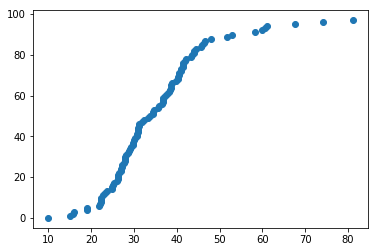

In [1068]:
plt.scatter(trial.Average.values, x)
x = np.arange(0,98)

## normalized all players


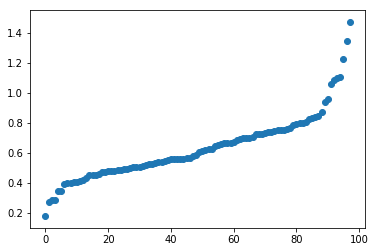

In [1186]:
x = np.arange(0,98)
plt.scatter(x, trial_max_avg.Average.values)


In [1207]:
new_avg = new_avg.sort_values('new_avg')

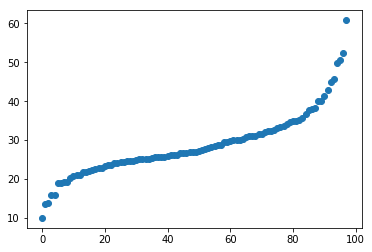

In [1204]:
x = np.arange(0,98)
plt.scatter(x, new_avg.new_avg.values)

## suresh Raina normal averages

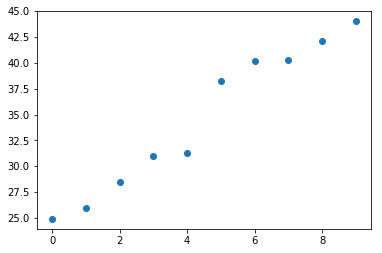

In [1112]:
tt = trial[(trial.batsman_striker== 'SK Raina')]

y1 = tt.Average.values
plt.scatter(x1, y1)

## raina normalized averages

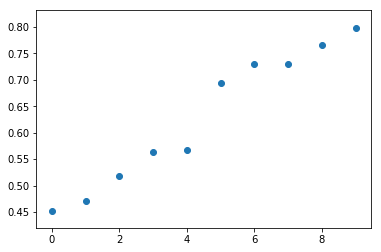

In [1184]:
tt = trial_max_avg[(trial_max_avg.batsman_striker== 'SK Raina')]

y1 = tt.Average.values
plt.scatter(x1, y1)

## highes point removed

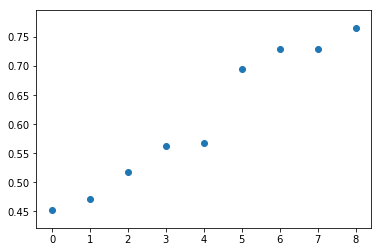

In [1216]:

tt = trial_max_avg[(trial_max_avg.batsman_striker== 'SK Raina')]

y1 = tt.Average.values[:-1]
plt.scatter(x1[:-1], y1)

## raina new average

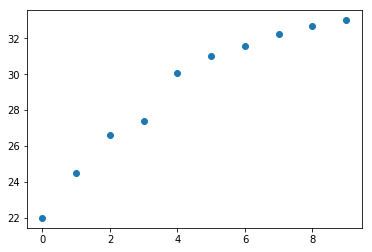

In [1217]:
tt = new_avg[(new_avg.batsman_striker== 'SK Raina')]

y1 = tt.new_avg.values
plt.scatter(x1, y1)

### Dhoni highest avg removed

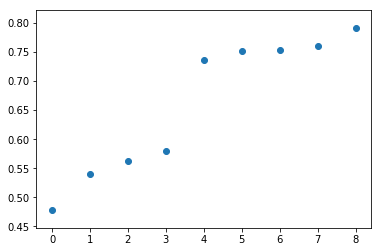

In [1196]:

tt = trial_max_avg[(trial_max_avg.batsman_striker== 'MS Dhoni')]

y1 = tt.Average.values[:-1]
plt.scatter(x1[:-1], y1)

## Dhoni normal averages

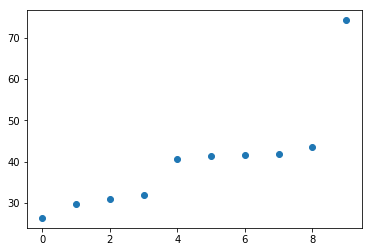

In [1113]:
tt = trial[(trial.batsman_striker== 'MS Dhoni')]

y1 = tt.Average.values
plt.scatter(x1, y1)

## Dhoni new batting average

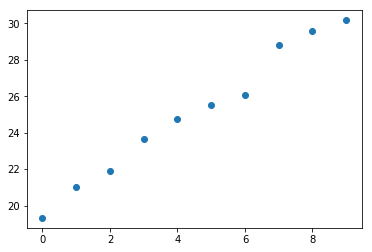

In [1211]:
tt = new_avg[(new_avg.batsman_striker== 'MS Dhoni')]

y1 = tt.new_avg.values
plt.scatter(x1, y1)

## gambhir  averages

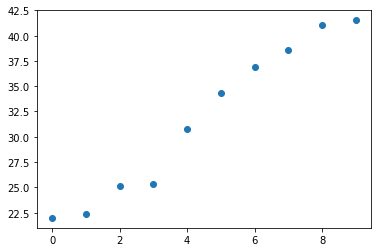

In [1116]:
tt = trial[(trial.batsman_striker== 'G Gambhir')]

y1 = tt.Average.values
plt.scatter(x1, y1)

## gambir normalized averages

In [1182]:
trial_max_avg = trial_max_avg.sort_values('Average')

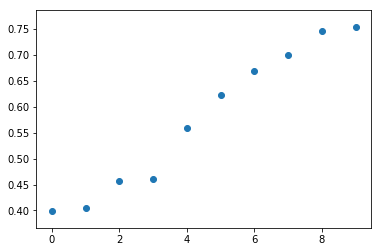

In [1183]:


tt = trial_max_avg[(trial_max_avg.batsman_striker== 'G Gambhir')]

y1 = tt.Average.values
plt.scatter(x1, y1)

## gambir normalized averages, highest point removed

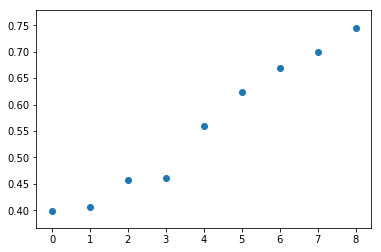

In [1200]:
tt = trial_max_avg[(trial_max_avg.batsman_striker== 'G Gambhir')]

y1 = tt.Average.values[:-1]
plt.scatter(x1[:-1], y1)

### gambir new average

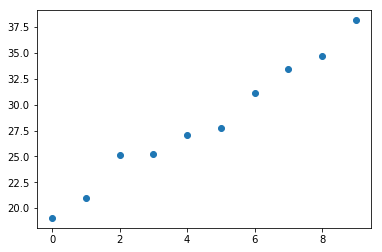

In [1215]:
tt = new_avg[(new_avg.batsman_striker== 'G Gambhir')]

y1 = tt.new_avg.values
plt.scatter(x1, y1)

Text(0.5,1,'kohli average')

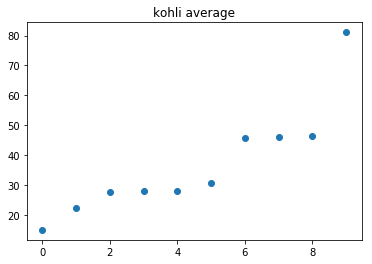

In [1226]:
tt = (trial[(trial.batsman_striker== 'V Kohli')])
tt = tt.sort_values('Average')
y1 = tt.Average.values
plt.scatter(x1, y1)
plt.title('kohli average')

## normalized V kohli

Text(0.5,1,'kohli normalized average')

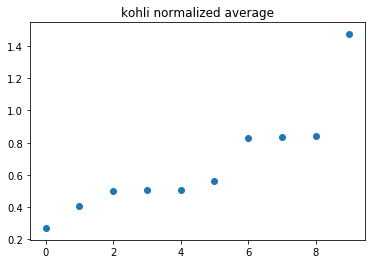

In [1220]:
tt = trial_max_avg[(trial_max_avg.batsman_striker== 'V Kohli')]

y1 = tt.Average.values
plt.scatter(x1, y1)
plt.title('kohli normalized average')

Text(0.5,1,'kohli highest avg removed')

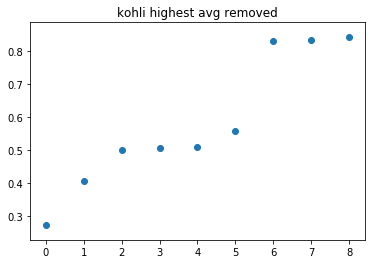

In [1222]:
tt = trial_max_avg[(trial_max_avg.batsman_striker== 'V Kohli')]

y1 = tt.Average.values[:-1]
plt.scatter(x1[:-1], y1)
plt.title( 'kohli highest avg removed')

Text(0.5,1,'kohli new average')

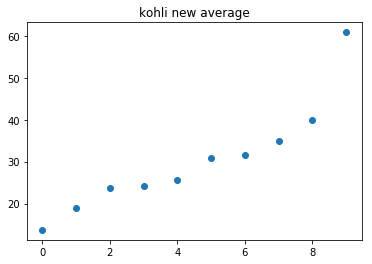

In [1221]:
tt = new_avg[(new_avg.batsman_striker== 'V Kohli')]

y1 = tt.new_avg.values
plt.scatter(x1, y1)
plt.title( 'kohli new average')

In [1149]:
trial_max_avg

player_id batsman_striker   Average
9           22  AB de Villiers  0.677135
12          22  AB de Villiers  0.287919
4           22  AB de Villiers  0.959426
9           22  AB de Villiers  0.344921
11          22  AB de Villiers  0.938005
9           22  AB de Villiers  0.723972
3           22  AB de Villiers  0.846691
9           22  AB de Villiers  0.629391
2           22  AB de Villiers  0.651902
4           22  AB de Villiers  0.490152
32          85        CH Gayle  0.477262
41          85        CH Gayle  1.089226
26          85        CH Gayle  0.742852
41          85        CH Gayle  0.588908
34          85        CH Gayle  0.403377
27          85        CH Gayle  0.395389
43          85        CH Gayle  1.108832
41          85        CH Gayle  1.226468
27          85        CH Gayle  0.412090
31         103       DA Warner  0.871381
48         103       DA Warner  0.663883
46         103       DA Warner  0.531724
45         103       DA Warner  0.511936
32         103       DA Warner  0.784787
41         103       DA Warner  1.057820
45         103       DA Warner  0.452392
34         103       DA Warner  0.422801
33         103       DA Warner  1.099573
40         137       G Gambhir  0.405374
53         137       G Gambhir  0.745757
58         137       G Gambhir  0.460742
42         137       G Gambhir  0.456567
65         137       G Gambhir  0.669511
44         137       G Gambhir  0.399383
43         137       G Gambhir  0.699646
59         137       G Gambhir  0.623763
50         137       G Gambhir  0.753381
57         137       G Gambhir  0.558773
107        259        MS Dhoni  0.760824
81         259        MS Dhoni  0.562767
83         259        MS Dhoni  1.347009
85         259        MS Dhoni  0.753381
101        259        MS Dhoni  0.578923
90         259        MS Dhoni  0.751566
87         259        MS Dhoni  0.736498
106        259        MS Dhoni  0.790778
110        259        MS Dhoni  0.540074
90         259        MS Dhoni  0.478533
114        323       RG Sharma  0.505582
102        323       RG Sharma  0.544613
108        323       RG Sharma  0.431878
133        323       RG Sharma  0.613960
101        323       RG Sharma  0.625034
123        323       RG Sharma  0.523918
139        323       RG Sharma  0.697649
109        323       RG Sharma  0.806935
134        323       RG Sharma  0.561496
116        323       RG Sharma  0.666788
121        340      RV Uthappa  0.288826
111        340      RV Uthappa  0.476899
130        340      RV Uthappa  0.565853
140        340      RV Uthappa  0.490152
144        340      RV Uthappa  0.492330
122        340      RV Uthappa  0.645548
110        340      RV Uthappa  0.541890
105        340      RV Uthappa  0.550604
139        340      RV Uthappa  0.479259
105        340      RV Uthappa  0.798766
144        347        S Dhawan  0.737769
123        347        S Dhawan  0.181538
147        347        S Dhawan  0.705818
112        347        S Dhawan  0.699646
133        347        S Dhawan  0.346737
126        347        S Dhawan  0.685849
114        347        S Dhawan  0.668966
143        347        S Dhawan  0.605065
107        347        S Dhawan  0.492875
107        347        S Dhawan  0.526459
119        374        SK Raina  0.729418
113        374        SK Raina  0.452573
158        374        SK Raina  0.470909
114        374        SK Raina  0.730326
119        374        SK Raina  0.517382
139        374        SK Raina  0.562767
153        374        SK Raina  0.765181
164        374        SK Raina  0.568031
144        374        SK Raina  0.694744
151        374        SK Raina  0.798766
140        431         V Kohli  0.559136
172        431         V Kohli  0.828538
129        431         V Kohli  0.833439
182        431         V Kohli  0.842698
174        431         V Kohli  0.508305
166        431         V Kohli  0.506672
127        431         V Kohli  0.501407
157        431         V Kohli  0.405918
166        431         V Koh

In [1163]:
avg.sort_values('player_id')

player_id batsman_striker  Average
9           22  AB de Villiers    37.30
12          22  AB de Villiers    15.86
4           22  AB de Villiers    52.85
9           22  AB de Villiers    19.00
11          22  AB de Villiers    51.67
9           22  AB de Villiers    39.88
3           22  AB de Villiers    46.64
9           22  AB de Villiers    34.67
2           22  AB de Villiers    35.91
4           22  AB de Villiers    27.00
32          85        CH Gayle    26.29
41          85        CH Gayle    60.00
26          85        CH Gayle    40.92
41          85        CH Gayle    32.44
34          85        CH Gayle    22.22
27          85        CH Gayle    21.78
43          85        CH Gayle    61.08
41          85        CH Gayle    67.56
27          85        CH Gayle    22.70
31         103       DA Warner    48.00
48         103       DA Warner    36.57
46         103       DA Warner    29.29
45         103       DA Warner    28.20
32         103       DA Warner    43.23
41         103       DA Warner    58.27
45         103       DA Warner    24.92
34         103       DA Warner    23.29
33         103       DA Warner    60.57
40         137       G Gambhir    22.33
53         137       G Gambhir    41.08
58         137       G Gambhir    25.38
42         137       G Gambhir    25.15
65         137       G Gambhir    36.88
44         137       G Gambhir    22.00
43         137       G Gambhir    38.54
59         137       G Gambhir    34.36
50         137       G Gambhir    41.50
57         137       G Gambhir    30.78
107        259        MS Dhoni    41.91
81         259        MS Dhoni    31.00
83         259        MS Dhoni    74.20
85         259        MS Dhoni    41.50
101        259        MS Dhoni    31.89
90         259        MS Dhoni    41.40
87         259        MS Dhoni    40.57
106        259        MS Dhoni    43.56
110        259        MS Dhoni    29.75
90         259        MS Dhoni    26.36
114        323       RG Sharma    27.85
102        323       RG Sharma    30.00
108        323       RG Sharma    23.79
133        323       RG Sharma    33.82
101        323       RG Sharma    34.43
123        323       RG Sharma    28.86
139        323       RG Sharma    38.43
109        323       RG Sharma    44.45
134        323       RG Sharma    30.93
116        323       RG Sharma    36.73
121        340      RV Uthappa    15.91
111        340      RV Uthappa    26.27
130        340      RV Uthappa    31.17
140        340      RV Uthappa    27.00
144        340      RV Uthappa    27.12
122        340      RV Uthappa    35.56
110        340      RV Uthappa    29.85
105        340      RV Uthappa    30.33
139        340      RV Uthappa    26.40
105        340      RV Uthappa    44.00
144        347        S Dhawan    40.64
123        347        S Dhawan    10.00
147        347        S Dhawan    38.88
112        347        S Dhawan    38.54
133        347        S Dhawan    19.10
126        347        S Dhawan    37.78
114        347        S Dhawan    36.85
143        347        S Dhawan    33.33
107        347        S Dhawan    27.15
107        347        S Dhawan    29.00
119        374        SK Raina    40.18
113        374        SK Raina    24.93
158        374        SK Raina    25.94
114        374        SK Raina    40.23
119        374        SK Raina    28.50
139        374        SK Raina    31.00
153        374        SK Raina    42.15
164        374        SK Raina    31.29
144        374        SK Raina    38.27
151        374        SK Raina    44.00
140        431         V Kohli    30.80
172        431         V Kohli    45.64
129        431         V Kohli    45.91
182        431         V Kohli    46.42
174        431         V Kohli    28.00
166        431         V Kohli    27.91
127        431         V Kohli    27.62
157        431         V Kohli    22.36
166        431         V Kohli    15.00
138        431         V Kohli    81.08

In [1168]:
avg['new_avg']= avg.runs_scored / avg.matches

In [1206]:
new_avg = avg[['player_id', 'batsman_striker', 'Average', 'new_avg']]

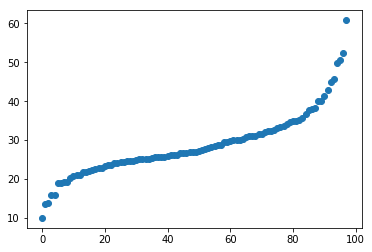

In [1227]:
x = np.arange(0,98)
plt.scatter(x, new_avg.new_avg.values)


## new Average -> runs/ matches

(array([ 3.,  6., 25., 30., 19.,  7.,  3.,  2.,  2.,  1.]),
 array([10.     , 15.08125, 20.1625 , 25.24375, 30.325  , 35.40625,
        40.4875 , 45.56875, 50.65   , 55.73125, 60.8125 ]),
 <a list of 10 Patch objects>)

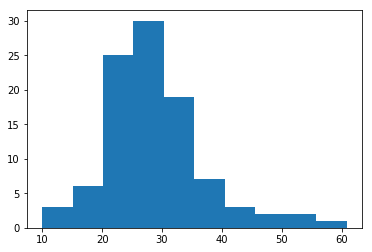

In [1173]:
plt.hist(new_avg.new_avg.values)

### batting average

(array([ 4., 10., 33., 17., 20.,  6.,  2.,  3.,  1.,  2.]),
 array([10.   , 17.108, 24.216, 31.324, 38.432, 45.54 , 52.648, 59.756,
        66.864, 73.972, 81.08 ]),
 <a list of 10 Patch objects>)

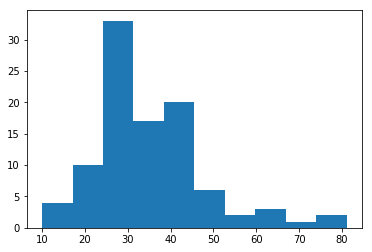

In [1174]:
plt.hist(new_avg.Average)

### normalized average

(array([ 4., 10., 33., 17., 20.,  6.,  2.,  3.,  1.,  2.]),
 array([0.18153762, 0.31057457, 0.43961151, 0.56864845, 0.6976854 ,
        0.82672234, 0.95575928, 1.08479622, 1.21383317, 1.34287011,
        1.47190705]),
 <a list of 10 Patch objects>)

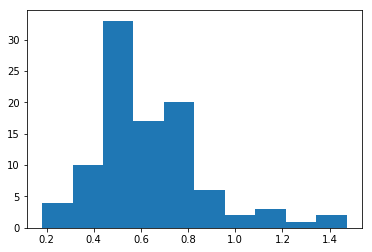

In [1176]:
plt.hist(trial_max_avg.Average.values)

In [1230]:
train = train.sort_values('Average')

In [1231]:
av = train.Average.values

In [1232]:
len(av)

1507

(array([729., 508., 205.,  39.,  18.,   6.,   1.,   0.,   0.,   1.]),
 array([  0. ,  15.2,  30.4,  45.6,  60.8,  76. ,  91.2, 106.4, 121.6,
        136.8, 152. ]),
 <a list of 10 Patch objects>)

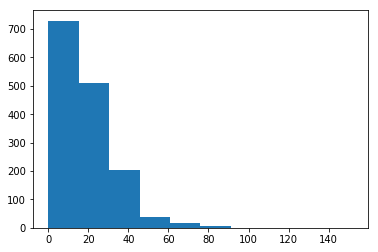

In [1233]:
plt.hist(av)

In [1234]:
train.head()

batsman_striker  player_id  season  ball  matches  runs_scored  \
86        K Upadhyay        191    2012     8        1           11   
91   KMDN Kulasekara        204    2012     3        1            5   
147        SB Jakati        367    2012    12        2            7   
146         SA Yadav        365    2012     4        1            0   
145         S Nadeem        354    2012     2        1            0   

     total_outs  highest_score  Average  strike_rate  Average_1st_innings  \
86          0.0             11      0.0       137.50                  0.0   
91          0.0              5      0.0       166.67                  0.0   
147         0.0              6      0.0        58.33                  0.0   
146         1.0              0      0.0         0.00                  0.0   
145         0.0              0      0.0         0.00                  0.0   

     strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
86                      0.00                  0.0                   137.50   
91                      0.00                  0.0                   166.67   
147                    58.33                  0.0                     0.00   
146                     0.00                  0.0                     0.00   
145                     0.00                  0.0                     0.00   

     toss_win_count  30+  50+  75+  number_of_zeros         DOB  \
86              1.0  0.0  0.0  0.0              0.0   6/18/1986   
91              0.0  0.0  0.0  0.0              0.0   7/22/1982   
147             0.0  0.0  0.0  0.0              0.0  11/27/1980   
146             1.0  0.0  0.0  0.0              1.0   9/14/1990   
145             1.0  0.0  0.0  0.0              1.0   8/12/1989   

              Bowling_skill  Australia  Bangladesh  England  India  \
86         Right-arm medium          0           0        0      1   
91    Right-arm fast-medium          0           0        0      0   
147  Slow left-arm orthodox          0           0        0      1   
146      Right-arm offbreak          0           0        0      1   
145  Slow left-arm orthodox          0           0        0      1   

     Netherlands  New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  \
86             0            0         0             0          0            0   
91             0            0         0             0          1            0   
147            0            0         0             0          0            0   
146            0            0         0             0          0            0   
145            0            0         0             0          0            0   

     Zimbabwea  Right_hand_bat  age  
86           0               1   26  
91           0               1   30  
147          0               0   32  
146          0               1   22  
145          0               1   23

In [1235]:
train['new_avg'] = train.runs_scored/ train.matches

(array([450., 294., 259., 213., 169.,  75.,  25.,  14.,   5.,   3.]),
 array([ 0.     ,  6.08125, 12.1625 , 18.24375, 24.325  , 30.40625,
        36.4875 , 42.56875, 48.65   , 54.73125, 60.8125 ]),
 <a list of 10 Patch objects>)

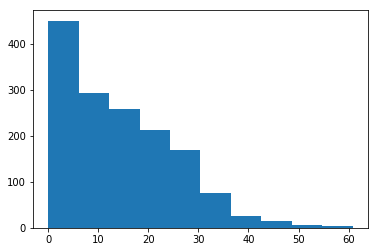

In [1236]:
plt.hist(train.new_avg.values)

In [1244]:
test.season.unique()

array([2012., 2008., 2009., 2011., 2010., 2016., 2013., 2014., 2015.])

In [1246]:
train, test  = train_and_test(2010, 2010)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def test_batting_first(df):


In [1252]:
train['new_avg'] = train.runs_scored / train.matches

In [1253]:
test['new_avg'] = test.runs_scored / test.matches

In [1256]:
X_train = train.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored','batsman_striker', 'Bowling_skill', 'DOB'], axis= 1)
y_test = test['runs_scored'].values

In [1257]:
g = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)
g.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1258]:
y_pred = g.predict(X_test)


gr_s = g.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:53690.37366153712


# new_avg only

In [1273]:
X_train = train[['player_id',  'new_avg']]

y_train = train['runs_scored'].values

X_test = test[['player_id',  'new_avg']]
y_test = test['runs_scored'].values

In [1274]:
plz1 = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)


In [1275]:
plz1.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1276]:
y_pred = plz1.predict(X_test)


gr_s = plz1.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:19010.428998113523


## Average+new_avg

In [1277]:
X_train = train[['player_id', 'Average','new_avg']]
y_train = train['runs_scored'].values

X_test = test[['player_id', 'Average', 'new_avg']]
y_test = test['runs_scored'].values

In [1278]:
ok1= GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)


In [1279]:
ok1.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1280]:
y_pred = ok1.predict(X_test)


gr_s = ok1.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:16729.823878435232


# all features + new avg - average

In [1269]:
X_train = train.drop(['runs_scored','Average', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored','batsman_striker','Average', 'Bowling_skill', 'DOB'], axis= 1)
y_test = test['runs_scored'].values

In [1270]:
challo = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)


In [1271]:
challo.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1272]:
y_pred = challo.predict(X_test)


gr_s = challo.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:52502.842861536854


In [1281]:
X_train = train.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored','batsman_striker', 'Bowling_skill', 'DOB'], axis= 1)
y_test = test['runs_scored'].values

In [1282]:
balle = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)
balle.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1283]:
y_pred = balle.predict(X_test)


gr_s = balle.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:53974.85142416669


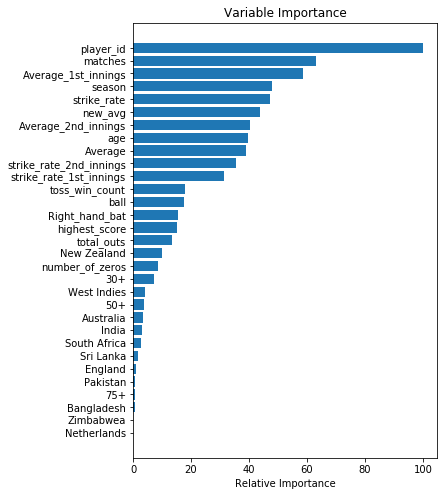

In [1286]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = balle.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [1284]:
train.head()

batsman_striker  player_id  season  ball  matches  runs_scored  \
0          A Chopra          3    2008    55        5           42   
116       RG Sharma        324    2008   276       12          404   
117        RP Singh        329    2008    25        9           27   
118        RR Powar        332    2008    21        1           28   
119         RR Raje        333    2008     9        3            8   

     total_outs  highest_score  Average  strike_rate  Average_1st_innings  \
0           5.0             24     8.40        76.36                10.00   
116        11.0             76    36.73       146.38                41.67   
117         4.0             10     6.75       108.00                 5.67   
118         0.0             28     0.00       133.33                 0.00   
119         0.0              6     0.00        88.89                 0.00   

     strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
0                      76.92                  2.0                    66.67   
116                   152.44                 30.8                   137.50   
117                   106.25                 10.0                   111.11   
118                   133.33                  0.0                     0.00   
119                    88.89                  0.0                     0.00   

     toss_win_count  30+  50+  75+  number_of_zeros        DOB  \
0               3.0  0.0  0.0  0.0              0.0  9/19/1977   
116             7.0  3.0  3.0  1.0              1.0  4/30/1987   
117             6.0  0.0  0.0  0.0              0.0  12/6/1985   
118             1.0  0.0  0.0  0.0              0.0  5/20/1978   
119             0.0  0.0  0.0  0.0              0.0   9/3/1986   

             Bowling_skill  Australia  Bangladesh  England  India  \
0       Right-arm offbreak          0           0        0      1   
116     Right-arm offbreak          0           0        0      1   
117   Left-arm fast-medium          0           0        0      1   
118     Right-arm offbreak          0           0        0      1   
119  Right-arm fast-medium          0           0        0      1   

     Netherlands  New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  \
0              0            0         0             0          0            0   
116            0            0         0             0          0            0   
117            0            0         0             0          0            0   
118            0            0         0             0          0            0   
119            0            0         0             0          0            0   

     Zimbabwea  Right_hand_bat  age    new_avg  
0            0               1   31   8.400000  
116          0               1   21  33.666667  
117          0               1   23   3.000000  
118          0               1   30  28.000000  
119          0               1   22   2.666667

In [1292]:
X_train = train.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB', '75+', 'Pakistan','number_of_zeros', 'Netherlands', 'Zimbabwea', '50+'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB', '75+', 'Pakistan','number_of_zeros', 'Netherlands', 'Zimbabwea', '50+'], axis=1)
y_test = test['runs_scored'].values

In [1293]:
loh = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)



In [1294]:
loh.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1295]:
y_pred = loh.predict(X_test)


gr_s = loh.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:52616.962173588334


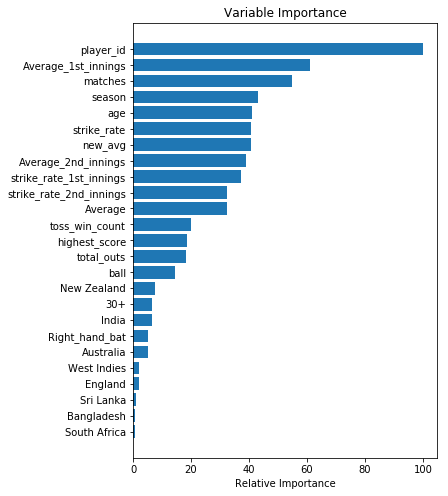

In [1296]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = loh.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [1299]:
test.sort_values('runs_scored', ascending=False)

batsman_striker  player_id  ball  matches  runs_scored  total_outs  \
20        AC Gilchrist         25   665       30          931        29.0   
267           SK Raina        375   622       28          855        25.0   
93           G Gambhir        138   677       29          820        26.0   
215          RG Sharma        324   599       28          766        24.0   
164          ML Hayden        252   544       16          761        14.0   
168           MS Dhoni        260   589       27          746        18.0   
286      ST Jayasuriya        395   538       26          735        24.0   
323          YK Pathan        455   445       28          696        26.0   
95            GC Smith        140   597       23          653        20.0   
125      KC Sangakkara        195   539       22          652        20.0   
208           R Dravid        309   538       26          642        25.0   
328       Yuvraj Singh        460   508       28          639        25.0   
266           SE Marsh        373   452       11          616         9.0   
306           V Sehwag        434   375       25          604        22.0   
18      AB de Villiers         23   459       19          560        14.0   
117          JH Kallis        177   537       26          560        24.0   
280       SR Tendulkar        390   504       20          552        17.0   
248         SC Ganguly        370   537       24          538        23.0   
101           HH Gibbs        148   503       23          538        20.0   
299         TM Dilshan        421   436       20          522        16.0   
227         RV Uthappa        341   468       27          495        20.0   
45         BB McCullum         67   344       17          474        15.0   
282          SR Watson        391   322       15          472        10.0   
190           PA Patel        290   446       22          444        20.0   
127         KD Karthik        196   332       21          433        14.0   
212          RA Jadeja        318   384       22          430        18.0   
143        LRPL Taylor        223   296       15          429        13.0   
77           DJ Hussey        113   328       17          417        15.0   
321    Y Venugopal Rao        453   335       22          412        19.0   
304            V Kohli        432   393       25          411        22.0   
10           A Symonds         12   282       11          410         9.0   
240        SA Asnodkar        363   339       17          409        17.0   
25            AM Nayar         38   297       21          399        17.0   
83    DPMD Jayawardene        124   310       22          398        13.0   
75            DJ Bravo        110   348       17          396        14.0   
233           S Dhawan        348   354       18          380        13.0   
61            BJ Hodge         73   335       15          377        12.0   
172         MV Boucher        263   302       19          375        12.0   
119          JP Duminy        183   334       12          372         9.0   
230        S Badrinath        346   304       22          369        15.0   
112          JA Morkel        169   241       20          338        11.0   
107          IK Pathan        158   284       22          327        16.0   
85            DR Smith        126   175       11          260        11.0   
141          LR Shukla        222   213       18          246        13.0   
275          SM Katich        380   191       11          241        10.0   
298           TL Suman        420   193       12          237        10.0   
316            WP Saha        447   160       17          231         8.0   
120           JR Hopes        185   152       11          221        11.0   
123             K Goel        188   219       14          200        14.0   
277         SP Fleming        385   171       10          196         9.0   
138      LA Pomersbach        217   150        9          193         5.0   
288

In [ ]:
### years train 2013 test 2014

In [1322]:
train, test  = train_and_test(2013, 2013)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  def test_batting_first(df):


In [1301]:
train.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013])

In [1323]:
train['new_avg'] = train.runs_scored / train.matches

In [1324]:
test['new_avg'] = test.runs_scored / test.matches

In [1325]:
season_2013 = train[train.season==2013]

In [1305]:
test.columns

Index(['batsman_striker', 'player_id', 'ball', 'matches', 'runs_scored',
       'total_outs', 'highest_score', 'Average', 'strike_rate',
       'Average_1st_innings', 'strike_rate_1st_innings', 'Average_2nd_innings',
       'strike_rate_2nd_innings', 'season', 'toss_win_count', '30+', '50+',
       '75+', 'number_of_zeros', 'DOB', 'Bowling_skill', 'Australia',
       'Bangladesh', 'England', 'India', 'Netherlands', 'New Zealand',
       'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwea',
       'Right_hand_bat', 'age'],
      dtype='object')

In [1326]:
test.drop('runs_scored', axis=1, inplace = True)

In [1327]:
season_2013 = season_2013[['player_id', 'batsman_striker','runs_scored']]

In [1328]:
test = test.merge(season_2013, on = ['batsman_striker', 'player_id'], how= 'left')

In [1329]:
test = test.dropna()

## only Average

In [1331]:
X_train = train[['player_id', 'Average']]
y_train = train['runs_scored'].values

X_test = test[['player_id', 'Average']]
y_test = test['runs_scored'].values

In [1332]:
glo = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)
glo.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1333]:
y_pred = glo.predict(X_test)


gr_s = glo.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:18423.261880245973


# new_avg only

In [1334]:
X_train = train[['player_id',  'new_avg']]

y_train = train['runs_scored'].values

X_test = test[['player_id',  'new_avg']]
y_test = test['runs_scored'].values

In [1335]:
fresh = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)


In [1336]:
fresh.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1337]:
y_pred = fresh.predict(X_test)


gr_s = fresh.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:17429.034848482403


## Average+new_avg

In [1338]:
X_train = train[['player_id', 'Average','new_avg']]
y_train = train['runs_scored'].values

X_test = test[['player_id', 'Average', 'new_avg']]
y_test = test['runs_scored'].values

In [1339]:
raba= GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)


In [1340]:
raba.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1341]:
y_pred = raba.predict(X_test)


gr_s = raba.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:18056.685266421875


# all features + new avg - average

In [1342]:
X_train = train.drop(['runs_scored','Average', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored','batsman_striker','Average', 'Bowling_skill', 'DOB'], axis= 1)
y_test = test['runs_scored'].values

In [1343]:
rakha = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)


In [1344]:
rakha.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1345]:
y_pred = rakha.predict(X_test)


gr_s = rakha.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:33926.41829891568


### All features

In [1346]:
X_train = train.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored','batsman_striker', 'Bowling_skill', 'DOB'], axis= 1)
y_test = test['runs_scored'].values

In [1347]:
tara = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)
tara.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1348]:
y_pred = tara.predict(X_test)


gr_s = tara.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:34892.790601444256


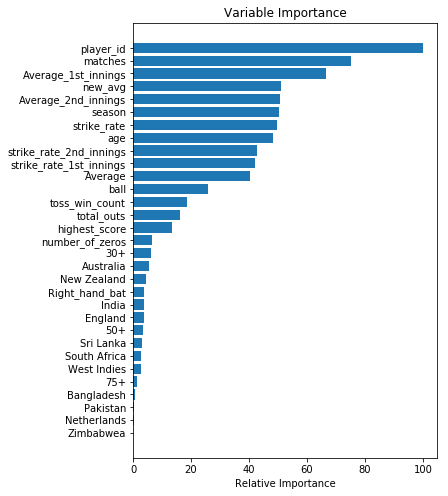

In [1349]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = tara.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [1284]:
train.head()

batsman_striker  player_id  season  ball  matches  runs_scored  \
0          A Chopra          3    2008    55        5           42   
116       RG Sharma        324    2008   276       12          404   
117        RP Singh        329    2008    25        9           27   
118        RR Powar        332    2008    21        1           28   
119         RR Raje        333    2008     9        3            8   

     total_outs  highest_score  Average  strike_rate  Average_1st_innings  \
0           5.0             24     8.40        76.36                10.00   
116        11.0             76    36.73       146.38                41.67   
117         4.0             10     6.75       108.00                 5.67   
118         0.0             28     0.00       133.33                 0.00   
119         0.0              6     0.00        88.89                 0.00   

     strike_rate_1st_innings  Average_2nd_innings  strike_rate_2nd_innings  \
0                      76.92                  2.0                    66.67   
116                   152.44                 30.8                   137.50   
117                   106.25                 10.0                   111.11   
118                   133.33                  0.0                     0.00   
119                    88.89                  0.0                     0.00   

     toss_win_count  30+  50+  75+  number_of_zeros        DOB  \
0               3.0  0.0  0.0  0.0              0.0  9/19/1977   
116             7.0  3.0  3.0  1.0              1.0  4/30/1987   
117             6.0  0.0  0.0  0.0              0.0  12/6/1985   
118             1.0  0.0  0.0  0.0              0.0  5/20/1978   
119             0.0  0.0  0.0  0.0              0.0   9/3/1986   

             Bowling_skill  Australia  Bangladesh  England  India  \
0       Right-arm offbreak          0           0        0      1   
116     Right-arm offbreak          0           0        0      1   
117   Left-arm fast-medium          0           0        0      1   
118     Right-arm offbreak          0           0        0      1   
119  Right-arm fast-medium          0           0        0      1   

     Netherlands  New Zealand  Pakistan  South Africa  Sri Lanka  West Indies  \
0              0            0         0             0          0            0   
116            0            0         0             0          0            0   
117            0            0         0             0          0            0   
118            0            0         0             0          0            0   
119            0            0         0             0          0            0   

     Zimbabwea  Right_hand_bat  age    new_avg  
0            0               1   31   8.400000  
116          0               1   21  33.666667  
117          0               1   23   3.000000  
118          0               1   30  28.000000  
119          0               1   22   2.666667

In [1355]:
## took more features off

In [1350]:
X_train = train.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB', '75+', 'Pakistan','number_of_zeros', 'Netherlands', 'Zimbabwea', '50+'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB', '75+', 'Pakistan','number_of_zeros', 'Netherlands', 'Zimbabwea', '50+'], axis=1)
y_test = test['runs_scored'].values

In [1351]:
ek = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)



In [1352]:
ek.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1353]:
y_pred = ek.predict(X_test)


gr_s = ek.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:36119.61468131578


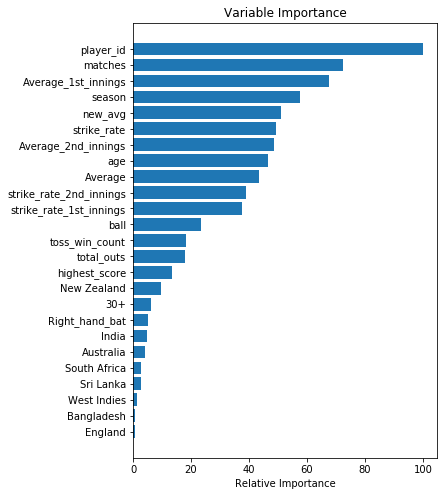

In [1354]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = ek.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [1357]:
X_train = train.drop(['Right_hand_bat', '30+','England', 'Bangladesh', 'West Indies', 'Sri Lanka', 'South Africa', 'Australia', 'India','runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB', '75+', 'Pakistan','number_of_zeros', 'Netherlands', 'Zimbabwea', '50+'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['Right_hand_bat', '30+','England', 'Bangladesh', 'West Indies', 'Sri Lanka', 'South Africa', 'Australia', 'India','runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB', '75+', 'Pakistan','number_of_zeros', 'Netherlands', 'Zimbabwea', '50+'], axis=1)

y_test = test['runs_scored'].values

In [1358]:
oye = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)



In [1359]:
oye.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1360]:
y_pred = oye.predict(X_test)


gr_s = oye.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:36201.65349879448


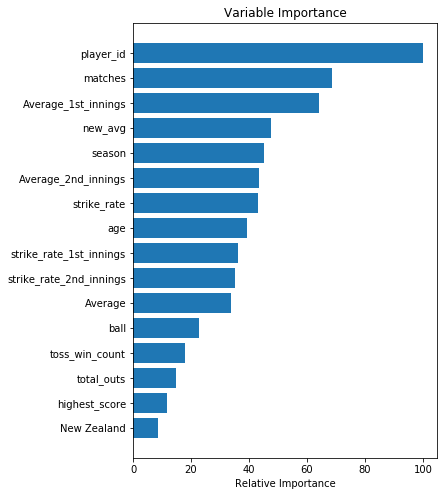

In [1361]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = oye.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


In [1363]:
X_train = train.drop(['Right_hand_bat', 'New Zealand', 'highest_score','total_outs', 'toss_win_count', 'ball','Average','30+','England', 'Bangladesh', 'West Indies', 'Sri Lanka', 'South Africa', 'Australia', 'India','runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB', '75+', 'Pakistan','number_of_zeros', 'Netherlands', 'Zimbabwea', '50+'], axis=1)

y_train = train['runs_scored'].values

X_test = test.drop(['Right_hand_bat', 'New Zealand', 'highest_score','total_outs', 'toss_win_count', 'ball','Average','30+','England', 'Bangladesh', 'West Indies', 'Sri Lanka', 'South Africa', 'Australia', 'India','runs_scored', 'batsman_striker', 'Bowling_skill', 'DOB', '75+', 'Pakistan','number_of_zeros', 'Netherlands', 'Zimbabwea', '50+'], axis=1)

y_test = test['runs_scored'].values

In [1364]:
bhai = GradientBoostingRegressor(learning_rate=0.05, max_depth= 3, min_samples_leaf=3,n_estimators=50000)



In [1365]:
bhai.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50000, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [1366]:
y_pred = bhai.predict(X_test)


gr_s = bhai.score(X_test, y_test)

mse_gb= mean_squared_error( y_test, y_pred)

print('MSE:{}'.format(mse_gb))
#print('Score:{}'.format(score_gb))

MSE:52445.21232900589


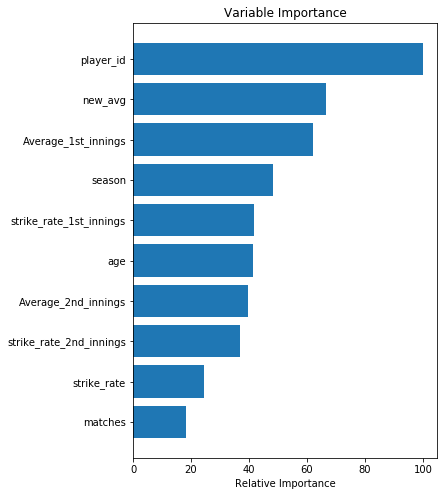

In [1367]:
fig, axs = plt.subplots(1,0, figsize=(12,8))
# Plot feature importance
feature_importance = bhai.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()
